# Latent Dirichlet Allocation

In [10]:
import numpy as np
from collections import Counter
import random
from operator import itemgetter
import pandas as pd
import time
from scipy.special import expit
from sklearn.metrics import accuracy_score
import math
from numpy import linalg as LA
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
import statistics as stat
import matplotlib.pyplot as plt
import warnings
import time

warnings.filterwarnings("ignore", category=RuntimeWarning)
start = time.time()

In [11]:
file_list = []
total_counter = Counter()
words = []
docs = []
K = 2
topics = []
for i in range(1,11,1):
    file_name = r"pp4data\pp4data\artificial\\" + str(i)
    with open(file_name) as file:
        file_data = file.read()
        c = Counter(file_data.split())
        for word in (file_data.split()):
            words.append(word)
            docs.append(i - 1)
            topics.append(random.randint(0, K - 1))
        file_list.append(c)
        total_counter+=c

In [12]:
# K denotes the no of topics
alpha = 2.5
beta = 0.01
topic_in_doc = []
for d in range(10):
    topic_in_doc.append([0 for i in range(K)])
    
for i in range(len(words)):
    topic_in_doc[docs[i]][topics[i]]+=1
    
#print(topic_in_doc)
word_in_topic = [{} for i in range(K)]

for i in range(len(words)):
    if words[i] in word_in_topic[topics[i]]:
        word_in_topic[topics[i]][words[i]]+=1
    else:
        word_in_topic[topics[i]][words[i]] = 1



In [13]:
def collapsed_gibbs(alpha, beta, K, words, topics, docs, total_counter, topic_in_doc, word_in_topic):
    rand_permutation = np.random.permutation(len(words))
    prob = [0 for i in range(K)]

    for n in range(500):
        for w in rand_permutation:
            word = words[w]
            document = docs[w]
            topic = topics[w]
            #print(word,document,topic)
            topic_in_doc[document][topic] -=1
            word_in_topic[topic][word] -=1
            
            for i in range(K):
                if word not in word_in_topic[i]:
                    word_in_topic[i][word] = 0
                term1 = (word_in_topic[i][word] + beta) / (len(total_counter)*beta + sum(word_in_topic[i].values()))
                term2 = (topic_in_doc[document][i] + alpha) / (K*alpha + sum(topic_in_doc[document]))
                prob[i] = term1 * term2

            # normalize probabilities
            sum_p = sum(prob)
            #print(sum_p)
            for i in range(K):
                prob[i] = prob[i]/sum_p
            
            #print(prob)
            #print(np.random.choice(np.arange(K), p = prob))
            topics[w] = np.random.choice(np.arange(K),p = prob)
            topic_in_doc[document][topics[w]] +=1
            if word in word_in_topic[topics[w]]:
                word_in_topic[topics[w]][word] +=1
            else:
                word_in_topic[topics[w]][word] = 1
    return word_in_topic

In [14]:
ans1 = collapsed_gibbs(alpha, beta, K, words, topics, docs, total_counter, topic_in_doc, word_in_topic)

In [15]:
for i in range(2):
    print("Topic "+str(i+1)+" : ",end = "" )
    for word,_ in sorted(ans1[i].items(), key=itemgetter(1), reverse = True)[0:3]:
        print(word, end = " ")
    print()
    

Topic 1 : loan bank dollars 
Topic 2 : bank water river 


We get the output of the 2 topics as expected. Seems like LDA is working.

In [16]:
file_list = []
total_counter = Counter()
words = []
docs = []
K = 20
topics = []
for i in range(1,201,1):
    file_name = r"pp4data\pp4data\20newsgroups\\" + str(i)
    with open(file_name) as file:
        file_data = file.read()
        c = Counter(file_data.split())
        for word in (file_data.split()):
            words.append(word)
            docs.append(i - 1)
            topics.append(random.randint(0, K - 1))
        file_list.append(c)
        total_counter+=c

In [17]:
# K denotes the no of topics
alpha = 5/20
beta = 0.01
topic_in_doc = []
for d in range(200):
    topic_in_doc.append([0 for i in range(K)])
    
for i in range(len(words)):
    topic_in_doc[docs[i]][topics[i]]+=1
    
word_in_topic = [{} for i in range(K)]

for i in range(len(words)):
    if words[i] in word_in_topic[topics[i]]:
        word_in_topic[topics[i]][words[i]]+=1
    else:
        word_in_topic[topics[i]][words[i]] = 1


In [18]:
ans = collapsed_gibbs(alpha, beta, K, words, topics, docs, total_counter, topic_in_doc, word_in_topic)

In [19]:
with open(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\pp4\topicwords.csv","w") as f:
    f.write("")

with open(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\pp4\topicwords.csv", "a") as f:
    for i in range(K):
        li = []
        for word,_ in sorted(ans[i].items(), key=itemgetter(1), reverse = True)[0:5]:
            li.append(word)
        row = (', ').join(li)
        print(row)
        f.write(row+'\n')

edu, people, eliot, washington, use
henry, edu, toronto, spencer, writes
car, clutch, don, ford, shifter
writes, edu, article, apr, don
space, nasa, long, science, sci
oil, service, time, come, change
system, nasa, mission, gov, oort
find, uiuc, read, never, two
station, option, redesign, capability, team
sky, bill, moon, light, rights
car, engine, driving, used, toyota
edu, gif, uci, ics, incoming
hst, mission, pat, access, net
shuttle, launch, space, cost, two
book, mustang, part, george, ford
insurance, want, make, money, geico
earth, etc, time, life, question
cars, heard, seat, torque, diesels
edu, internet, information, university, resources
good, point, large, even, such


The results obtained by LDA do make sense. This can be observed particularly in topic 5 (space, nasa, long, science, sci) which is about space and topic 18 (cars, heard, seat, torque, diesels) which is about cars. Most of the topics have some related words.

In [20]:
def bayasian_logistic_reg(X, t):
    time_vector = []
    start_time = time.time()
    alpha = 0.1
    X.reset_index(inplace = True, drop = True)
    #col = pd.DataFrame(np.ones((np.shape(X)[0],1)))
    
    #X['bias'] = col

    w_old = np.zeros((np.shape(X)[1],1))
    time_vector.append((w_old, time.time() - start_time))

    b = np.dot(X, w_old)
    y = expit(b)
    a =   y*(1 - y)
    R = np.diagflat(a)
    mat = np.dot(np.dot((X.T),R),(X))
    w_new = w_old - (np.dot(inv(alpha*np.identity(np.shape(mat)[0]) + mat), (np.dot(X.T, y - t) + alpha*w_old)))
    time_vector.append((w_new, time.time() - start_time))
    n = 1
    while(((LA.norm(w_new - w_old) / LA.norm(w_old)) > 10**(-3)) and (n <= 100)):
        w_old = w_new
        b = np.dot(X, w_old)
        y = expit(b)
        a =   y*(1 - y)
        R = np.diagflat(a)
        mat = np.dot(np.dot((X.T),R),X)
        w_new = w_old - (np.dot(inv(alpha*np.identity(np.shape(mat)[0]) + mat), (np.dot(X.T, y - t) + alpha*w_old)))
        time_vector.append((w_new, time.time() - start_time))
        n+=1

    return w_new, time_vector

In [21]:
X = []
for j in range(200):
    li = []
    for (word, count) in dict(total_counter).items():
        if(word in file_list[j]):
            li.append(file_list[j][word])
        else:
            li.append(0)
    X.append(li)

X = pd.DataFrame(X)
X['bias'] = pd.DataFrame(np.ones((np.shape(X)[0],1)))
file_name = r"pp4data\pp4data\20newsgroups\index.csv"
data = pd.read_csv(file_name, header = None)
t  = pd.DataFrame(data[data.columns[1]])


train_acc_bow = {}

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=(1/3))
    for j in range(0,len(X_train),10):
        if j not in train_acc_bow:
            train_acc_bow[j] = []

        _, X_tr, _ , y_tr = train_test_split(X_train, y_train, test_size=(j/(len(X_train))))
        w, time_vector = bayasian_logistic_reg(X_tr, y_tr)
        y = expit(np.dot(X_test, w))
        prob = [1 if a > 0.5 else 0 for a in y]
        train_acc_bow[j].append(1 - accuracy_score(prob, y_test))

In [26]:
X = pd.DataFrame(topic_in_doc)
X['bias'] = pd.DataFrame(np.ones((np.shape(X)[0],1)))

file_name = r"pp4data\pp4data\20newsgroups\index.csv"
data = pd.read_csv(file_name, header = None)
t  = pd.DataFrame(data[data.columns[1]])

train_acc_lda = {}

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=(1/3))
    for j in range(0,len(X_train),10):
        if j not in train_acc_lda:
            train_acc_lda[j] = []

        _, X_tr, _ , y_tr = train_test_split(X_train, y_train, test_size=(j/(len(X_train))))
        w, time_vector = bayasian_logistic_reg(X_tr, y_tr)
        y = expit(np.dot(X_test, w))
        prob = [1 if a > 0.5 else 0 for a in y]
        train_acc_lda[j].append(1 - accuracy_score(prob, y_test))

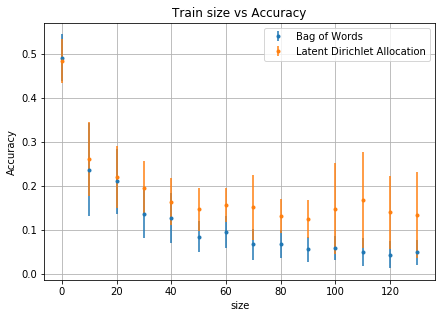

In [29]:
bow_mean = []
bow_size = []
bow_std = []

for size, accuracy_list in train_acc_bow.items():
    bow_mean.append(stat.mean(accuracy_list))
    bow_std.append(stat.stdev(accuracy_list))
    bow_size.append(size)

    
lda_mean = []
lda_size = []
lda_std = []

for size, accuracy_list in train_acc_lda.items():
    lda_mean.append(stat.mean(accuracy_list))
    lda_std.append(stat.stdev(accuracy_list))
    lda_size.append(size)
    

fig, ax = plt.subplots(nrows=1, ncols= 1)

fig.tight_layout(pad = 0.5, w_pad = 3, h_pad = 3)
ax.errorbar(bow_size, bow_mean, yerr = bow_std, fmt='.', label='Bag of Words')
ax.errorbar(lda_size, lda_mean, yerr = lda_std, fmt='.', label='Latent Dirichlet Allocation')
ax.legend(loc='upper right')
ax.set_ylabel('Accuracy')
ax.set_xlabel('size')
ax.set_title("Train size vs Accuracy")
ax.grid(True)


It seems that when the data size is very small both BOW and LDA have almost similar error rate. But as the size of the data increases BOW has significantly lesser error rate compared to LDA. 

There could be various reasons for it:
1. Maybe LDA hasn't converged in 500 iterations. 
2. Maybe k = 20 isn't the optimal value for the no of topics. 
3. Or maybe BOW provides a richer representation compared to LDA for a smaller dataset. For larger documents with lots of topics maybe LDA could work better.